В этой программе будет использоваться ранее написанный декодер для LDPC кодов. Будут получены гистограммы для C и V узлов кода (3, 6) на разных итерациях 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from math import e, log
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [8]:
size_of_sample = 1000
max_l = 100
l = 0
H = np.array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 
             [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], 
             [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
             [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
             [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
             [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]])


In [3]:
def dc_update(L_j_i):
    L_i_j = [[0 for i in range(12)] for j in range(6)]
    for i in range(len(L_i_j)):
        for j in range(len(L_i_j[0])):
            tmp = 1
            for k in range(len(L_i_j[0])):
                if (k != j):
                    if (H[i][k]):
                        tmp *= np.tanh(L_j_i[k][i] / 2)
            L_i_j[i][j] = 2 * np.arctanh(tmp)
    return L_i_j

In [4]:
def dv_update(L_i_j, L_j_i, L_j):
    for i in range(len(L_j_i)):
        for j in range(len(L_j_i[0])):
            tmp = L_j[i]
            for k in range(len(L_j_i[0])):
                if (k != j):
                    if (H[k][i]):
                        tmp += L_i_j[k][i]
            L_j_i[i][j] = tmp
    return L_j_i

In [5]:
def stop_kriteria(L_j_i, L_i_j, L_j, H, l):
    mv = np.zeros(12)
    for j in range(len(L_j_i)):
        tmp = 0
        for i in range(len(L_j_i[0])):
            if (H[i][j]):
                tmp += L_i_j[i][j]
        if (tmp + L_j[j] < 0):
            mv[j] = 1
        else:
            mv[j] = 0
    if (np.dot(mv, H.T).all() == 0):
        #print("got_it\n")
        #print(mv)
        #print(l)
        return True
    elif (l == max_l):
        #print("max_iter_reach")
        return False
    return 4

In [6]:
def iteration_of_sample(sigma):
    nu = np.random.normal(0, sigma, 12)
    l = 0
    x= np.random.randint(0,2,12)
    v = [-1 if (i == 1) else 1 for i in x]
    y = [v[i] + nu[i] for i in range(12)]
    L_j = [2 * i / (sigma ** 2) for i in y]
    L_j_i = [[L_j[j] if H[i][j] == 1 else 0 for i in range(6)] for j in range(12)]
    L_i_j = [[0 for i in range(12)] for j in range(6)]
    while True:
        L_i_j = dc_update(L_j_i)
        L_j_i = dv_update(L_i_j, L_j_i, L_j)
        l += 1
        if (stop_kriteria(L_j_i, L_i_j, L_j, H, l) != 4):
            break
    return l
    

L_ans - двойной массив, 9x1000, для $\sigma_1, \sigma_2, \dots \sigma_9$, значение $L[i][j]$ - количесто кодов, с количеством итераций = j

In [9]:
L_ans = [[], [], []]
sigmas = [0.4, 0.8809, 1.5]
for j in range(len(sigmas)):
    i = 0
    while (i < size_of_sample):
        l = iteration_of_sample(sigmas[j])
        L_ans[j].append(l)
        i += 1

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_17141/885635999.py:10: RuntimeWarning: divide by zero encountered in arctanh
  L_i_j[i][j] = 2 * np.arctanh(tmp)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_17141/3400298976.py:8: RuntimeWarning: invalid value encountered in double_scalars
  tmp += L_i_j[k][i]
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_17141/3887114276.py:7: RuntimeWarning: invalid value encountered in double_scalars
  tmp += L_i_j[i][j]


Text(0.5, 1.0, 'сигма 1.5')

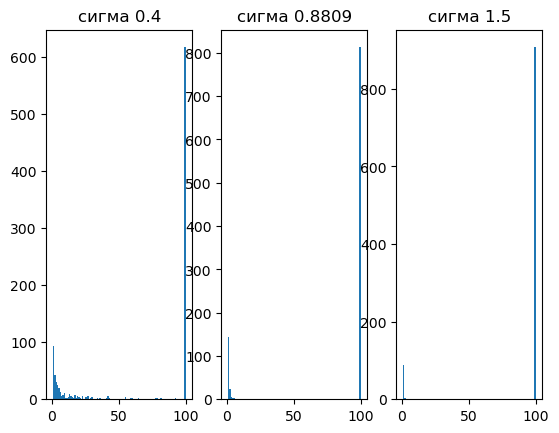

In [11]:
fig, axs = plt.subplots(1, 3)
n_bins = 100
axs[0].hist(L_ans[0], bins=n_bins)
axs[0].set_title('сигма 0.4')
axs[1].hist(L_ans[1], bins=n_bins)
axs[1].set_title('сигма 0.8809')
axs[2].hist(L_ans[2], bins=n_bins)
axs[2].set_title('сигма 1.5')

In [12]:
L_ans[0].count(100)

617